<a href="https://colab.research.google.com/github/munister-v/CyberForumMyCycleRepos/blob/master/Fedrov_A_%D0%A1%D0%B5%D0%BD%D1%82%D1%8F%D0%B1%D1%80%D1%8C%D1%81%D0%BA%D1%81%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_4_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек

In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, SimpleRNN
from tensorflow.python.keras.optimizers import Adam, RMSprop
from tensorflow.keras import utils #Используем для to_categoricall

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from sklearn.model_selection import train_test_split

import os

# Загрузка файлов

In [ ]:
#Загружаем архив с текстами с FTP/HTTP
def loadfiles(filename, fullpath):
  loaded = True
  if os.path.isfile(filename):
      print("File \"", filename, "\" has already downloaded.")
  else:
    print("Start downloading", filename)
    !wget $fullpath
    !unzip $filename
    loaded = False

  return loaded

!ls

 Marinina.zip
 sample_data
 Writers_texts.zip
'(Булгаков) Обучающая_5 вместе.txt'
'(Булгаков) Тестовая_2 вместе.txt'
'(Клиффорд_Саймак) Обучающая_5 вместе.txt'
'(Клиффорд_Саймак) Тестовая_2 вместе.txt'
'(Макс Фрай) Обучающая_5 вместе.txt'
'(Макс Фрай) Тестовая_2 вместе.txt'
'Маринина - Бой тигров в долине. Том 1 .txt'
'Маринина - Бой тигров в долине. Том 2 .txt'
'(О. Генри) Обучающая_50 вместе.txt'
'(О. Генри) Тестовая_20 вместе.txt'
'(Рэй Брэдберри) Обучающая_22 вместе.txt'
'(Рэй Брэдберри) Тестовая_8 вместе.txt'
'(Стругацкие) Обучающая_5 вместе.txt'
'(Стругацкие) Тестовая_2 вместе.txt'


In [ ]:
URL = "http://www.bizkit.ru/wp-content/uploads/COLAB/"
filename = "Writers_texts.zip"
fullpath = URL + filename
print(fullpath)

loaded = loadfiles(filename, fullpath)

#!rm $filename

http://www.bizkit.ru/wp-content/uploads/COLAB/Writers_texts.zip
File " Writers_texts.zip " has already downloaded.


In [ ]:
#files.upload()

#if not loaded:
#  !unzip $filename

In [ ]:
URL = "http://www.bizkit.ru/wp-content/uploads/COLAB/"
filename = "Marinina.zip"
fullpath = URL + filename
print(fullpath)

loaded = loadfiles(filename, fullpath)

http://www.bizkit.ru/wp-content/uploads/COLAB/Marinina.zip
File " Marinina.zip " has already downloaded.


In [ ]:
#if not loaded:
#  !unzip $filename

In [ ]:
!ls

 Marinina.zip
 sample_data
 Writers_texts.zip
'(Булгаков) Обучающая_5 вместе.txt'
'(Булгаков) Тестовая_2 вместе.txt'
'(Клиффорд_Саймак) Обучающая_5 вместе.txt'
'(Клиффорд_Саймак) Тестовая_2 вместе.txt'
'(Макс Фрай) Обучающая_5 вместе.txt'
'(Макс Фрай) Тестовая_2 вместе.txt'
'Маринина - Бой тигров в долине. Том 1 .txt'
'Маринина - Бой тигров в долине. Том 2 .txt'
'(О. Генри) Обучающая_50 вместе.txt'
'(О. Генри) Тестовая_20 вместе.txt'
'(Рэй Брэдберри) Обучающая_22 вместе.txt'
'(Рэй Брэдберри) Тестовая_8 вместе.txt'
'(Стругацкие) Обучающая_5 вместе.txt'
'(Стругацкие) Тестовая_2 вместе.txt'


#Загрузка данных

In [ ]:
def replaceMultiple(mainString, toBeReplaces, newString):
    # Iterate over the strings to be replaced
    for elem in toBeReplaces :
        # Check if string is in the main string
        if elem in mainString :
            # Replace the string
            mainString = mainString.replace(elem, newString)

    return  mainString

In [ ]:
#txt = replaceMultiple("Тестовая - запись — верна", ['\n\r', '\n', '\r', '-', '—'] , " ")
#print(txt)

In [ ]:
###########################
# Чтение файла в текст
##########################
def readText(fileName): #функция принимает имя файла
  f = open(fileName, 'r')        #задаем открытие нужного файла в режиме чтения
  text = f.read()                #читаем текст
  #text = text.replace("\n", " ") #переносы строки переводим в пробелы
  text = replaceMultiple(text, ['\n\r', '\n', '\r', u'\xa0'] , " ")
  #text = text.replace(u'\xa0', u' ')

  return text                    #функция возвращает текст файла

#Загружаем обучающие тексты
trainText = []
trainText.append(readText('(О. Генри) Обучающая_50 вместе.txt'))
trainText.append(readText('(Стругацкие) Обучающая_5 вместе.txt'))
trainText.append(readText('(Булгаков) Обучающая_5 вместе.txt'))
trainText.append(readText('(Клиффорд_Саймак) Обучающая_5 вместе.txt'))
trainText.append(readText('(Макс Фрай) Обучающая_5 вместе.txt'))
trainText.append(readText('(Рэй Брэдберри) Обучающая_22 вместе.txt'))
trainText.append(readText('Маринина - Бой тигров в долине. Том 1 .txt'))

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери", "Маринина"]
nClasses = len(className)

#Загружаем тестовые тексты
testText = []
testText.append(readText('(О. Генри) Тестовая_20 вместе.txt'))
testText.append(readText('(Стругацкие) Тестовая_2 вместе.txt'))
testText.append(readText('(Булгаков) Тестовая_2 вместе.txt'))
testText.append(readText('(Клиффорд_Саймак) Тестовая_2 вместе.txt'))
testText.append(readText('(Макс Фрай) Тестовая_2 вместе.txt'))
testText.append(readText('(Рэй Брэдберри) Тестовая_8 вместе.txt'))
testText.append(readText('Маринина - Бой тигров в долине. Том 2 .txt'))

for i in range(len(trainText)):
  print("Длина обучающего текста", className[i], "\t", len(trainText[i]), "\tПроверочного:", "\t", len(testText[i]))

Длина обучающего текста О. Генри 	 1049517 	Проверочного: 	 349662
Длина обучающего текста Стругацкие 	 2042469 	Проверочного: 	 704846
Длина обучающего текста Булгаков 	 1765648 	Проверочного: 	 875042
Длина обучающего текста Саймак 	 1609507 	Проверочного: 	 318811
Длина обучающего текста Фрай 	 3700010 	Проверочного: 	 1278191
Длина обучающего текста Брэдбери 	 1386454 	Проверочного: 	 868673
Длина обучающего текста Маринина 	 504955 	Проверочного: 	 474573


#Обработка данных


In [ ]:
#################
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью
#################

maxWordsCount = 20000 #определяем макс.кол-во слов/индексов, учитываемое при обучении текстов

#для этого воспользуемся встроенной в Keras функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!–"—#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»', lower=True, split=' ', char_level=False)
#выше задаем параметры:
#(num_words=maxWordsCount) - определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
#(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
#(lower=True) - приводим слова к нижнему регистру
#(split=' ') - разделяем слова по пробелу
#(char_level=False) - просим токенайзер не удалять однобуквенные слова

tokenizer.fit_on_texts(trainText) #"скармливаем" наши тексты, т.е даём в обработку методу, который соберет словарь частотности
items = list(tokenizer.word_index.items()) #Вытаскиваем индексы слов для просмотра

print(items[:20])






[('и', 1), ('в', 2), ('не', 3), ('я', 4), ('что', 5), ('на', 6), ('с', 7), ('он', 8), ('а', 9), ('как', 10), ('то', 11), ('это', 12), ('но', 13), ('все', 14), ('у', 15), ('по', 16), ('его', 17), ('к', 18), ('так', 19), ('мне', 20)]


In [ ]:
count_thres = 2
low_count_words = [w for w,c in tokenizer.word_counts.items() if c < count_thres]
print(len(low_count_words))
print(low_count_words[:10])

print(tokenizer.word_index['сейбах'])
print(tokenizer.word_docs['сейбах'])
print(tokenizer.word_counts['сейбах'])
dist = list(tokenizer.word_counts.items())

print(dist[:10])
print(trainText[0][:100])



63955
['хранимом', 'брильянтиком', 'вкрапленным', 'нависая', 'тюремщик', 'сейбах', 'склоняли', 'кордебалет', 'прима', 'busca']
78280
1
1
[('лиса', 35), ('на', 27709), ('рассвете', 65), ('коралио', 91), ('нежился', 6), ('в', 45508), ('полуденном', 2), ('зное', 3), ('как', 13748), ('томная', 2)]
«Лиса-на-рассвете»   Коралио нежился в полуденном зное, как томная красавица в сурово хранимом гарем


In [ ]:
a = tokenizer.texts_to_sequences(trainText)
print(a[:1])
print(len(a))

[[4918, 6, 2599, 1820, 2, 10, 6230, 2, 3328, 274, 1075, 15, 255, 2217, 6, 665, 8, 2600, 2, 1647, 8199, 9989, 998, 10, 26, 54, 138, 128, 119, 1478, 3402, 940, 1202, 16056, 36, 190, 60, 2696, 4773, 966, 1974, 3032, 2, 10554, 1, 17595, 222, 10, 16057, 142, 728, 593, 274, 1, 1934, 6979, 16, 374, 14793, 77, 14, 1506, 8200, 11225, 1249, 6, 8200, 8990, 7847, 50, 59, 14794, 2745, 241, 274, 4407, 78, 2529, 11916, 3, 717, 3552, 2, 1820, 4282, 4774, 7, 6231, 1363, 5996, 2159, 946, 266, 7244, 330, 7245, 222, 7531, 16, 143, 11916, 859, 7, 6980, 8991, 5776, 4919, 30, 4639, 1, 1229, 13662, 3707, 6, 7532, 1, 16058, 1, 2638, 11225, 1249, 303, 1954, 11917, 133, 42, 5407, 1, 3131, 5, 1249, 6, 982, 7, 967, 1, 5057, 2, 175, 17596, 4041, 1975, 5, 1954, 1249, 320, 11, 3479, 832, 11226, 14795, 92, 2, 1257, 16059, 39, 2, 1691, 2314, 10555, 16060, 700, 1542, 105, 1, 4522, 6, 547, 138, 1283, 92, 10556, 7, 5408, 2007, 1, 4775, 161, 570, 72, 5603, 6, 143, 7848, 105, 10557, 2, 1691, 42, 1352, 2007, 1864, 1, 22, 724

In [ ]:
#p = text_to_word_sequence(trainText[0], filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»——', lower=True, split=' ')
#print(p[:100])

In [ ]:
#print("Протестируем словарь частотности")
#print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("уточните слово: ")]) #протестируем словарь частотности

In [ ]:
#testText.append(readText('Маринина - Бой тигров в долине. Том 2 .txt'))

In [ ]:
print(len(trainText))

7


In [ ]:
#преобразовываем текст в последовательность индексов согласно частотному словарю
trainWordIndexes = tokenizer.texts_to_sequences(trainText) #обучающие тесты в индексы
testWordIndexes = tokenizer.texts_to_sequences(testText)  #проверочные тесты в индексы

print("Взглянем на фрагмент обучающего текста:")
print("Исходный текст:\t\t\t\t\t", trainText[1] [:87])
print("Он же в виде последовательности индексов:\t", trainWordIndexes[1][:20])

print("\r\nСтатистика по обучающим текстам:")
symbs = 0;
words = 0;
for i in range(len(trainText)):
  print(className[i], "\t", len(trainText[i]), "символов,", len(trainWordIndexes[i]), " слов")
  symbs += len(trainText[i])
  words += len(trainWordIndexes[i])

print("\r\nВ сумме:\t", symbs, "символов,", words, "слов")

print()
print("Статистика по обучающим текстам:")
symbs = 0;
words = 0;
for i in range(len(testText)):
  print(className[i], "\t", len(testText[i]), " символов, ", len(testWordIndexes[i]), " слов")
  symbs += len(testText[i])
  words += len(testWordIndexes[i])

print("\r\nВ сумме:\t", symbs, "символов,", words, "слов")

Взглянем на фрагмент обучающего текста:
Исходный текст:					 Парень из преисподней     1     Ну и деревня! Сроду я таких деревень не видел и не знал
Он же в виде последовательности индексов:	 [464, 21, 1537, 46, 1, 12384, 7750, 4, 399, 3, 254, 1, 3, 247, 54, 5, 225, 9305, 2577, 180]

Статистика по обучающим текстам:
О. Генри 	 1049517 символов, 131923  слов
Стругацкие 	 2042469 символов, 264513  слов
Булгаков 	 1765648 символов, 214398  слов
Саймак 	 1609507 символов, 221265  слов
Фрай 	 3700010 символов, 501686  слов
Брэдбери 	 1386454 символов, 183143  слов
Маринина 	 504955 символов, 68633  слов

В сумме:	 12058560 символов, 1585561 слов

Статистика по обучающим текстам:
О. Генри 	 349662  символов,  41947  слов
Стругацкие 	 704846  символов,  87409  слов
Булгаков 	 875042  символов,  106240  слов
Саймак 	 318811  символов,  42715  слов
Фрай 	 1278191  символов,  164646  слов
Брэдбери 	 868673  символов,  106731  слов
Маринина 	 474573  символов,  61716  слов

В сумме:	 4869798 симв

#Создание обучающей и проверочной выборки

**Функции для формирования выборки по отрезкам текста с заданным шагом**

In [ ]:
###########################
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
##########################
def getSetFromIndexes(wordIndexes, xLen, shift):
  xSample = []
  wordsLen = len(wordIndexes)
  index = 0

  #Идём по всей длине вектора индексов
  #"Откусываем" векторы длины xLen и смещаеммся вперёд на step

  while (index + xLen <= wordsLen):
    xSample.append(wordIndexes[index:index+xLen])
    index += shift

  return xSample

In [ ]:
arr = [x for x in range(23)]
print("Длина:", len(arr), "\r\n")
print("Входной вектор", arr, "\r\n")
indexes = getSetFromIndexes(arr, 10, 3)

for i in range(len(indexes)):
  print(indexes[i])

print("Общий размер:", len(indexes), "x", len(indexes[0]), '=', len(indexes[0]) * len(indexes))

Длина: 23 

Входной вектор [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Общий размер: 5 x 10 = 50


In [ ]:
#from numpy import array
#from numpy import argmax
#from keras.utils import to_categorical

#arr_cat = to_categorical(trainWordIndexes[1])
#print(len(trainWordIndexes[0]))
#print(arr_cat.shape)
#print(trainWordIndexes[0][:10])
#print(arr_cat[:20])

#arr1 = arr.flatten()
#print(len(arr1))
#print(arr1[:20])
#print(len(trainWordIndexes[0]) * 20000)

In [ ]:
#arr1 = []

In [ ]:
###########################
# Формирование обучающей и проверочной выборки
# Из двух листов индексов от двух классов
##########################
def createSetsMultiClasses2(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из классов создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов выборки
  classesXSamples = []        #здесь будет список размером "кол-во классов * кол-во окон в тексте * длину окна. Например, 6 по 1341*1000."
  for wI in wordIndexes:      #для каждого текста выборки из последовательности индексов
    classesXSamples.append(getSetFromIndexes(wI, xLen, step)) #добавляем в список очередной текст индексов, разбитый на "кол-во окон * длину окна"

  #Формируем один общий xSamples
  xSamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной по количеству классов"

  for t in range(nClasses): #в диапазоне кол-ва классов
    xT = classesXSamples[t] #берем очередной текст вида "кол-во окон в тексте*длину окна"(например 1341*1000)
    for i in range(len(xT)): #и каждое его окно
      xSamples.append(xT[i]) #добавляем в общий список выборки

    #Формируем ySamples по номеру класса
    currY = utils.to_categorical(t, nClasses) #текущий класс переводится в вектор длиной по количеству классов
    for i in range(len(xT)): #на каждое окно выборки
      ySamples.append(currY) #добавляем соответствующий вектор класса

  xSamples = np.array(xSamples) #переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) #переводим в массив numpy для подачи в нейронку


  return (xSamples, ySamples) #функция возвращает выборку и соответствующие векторы классов

In [ ]:
def createSetsMultiClasses(wordIndexes, xLen, step):

  #Для каждого из классов создаём обучающую/проверочную выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов выборки
  xSamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*длину окна(например 15779*1000)"
  ySamples = [] #здесь будет список размером "суммарное кол-во окон во всех текстах*вектор длиной по количеству классов"
  for t, wI in enumerate(wordIndexes):
    tmp = getSetFromIndexes(wI, xLen, step) #получаем список индексов, разбитый на "кол-во окон * длину окна"
    xSamples += tmp
    ySamples += [utils.to_categorical(t, nClasses).tolist()] * len(tmp)

  return (np.array(xSamples), np.array(ySamples))

**Подготовка данных**

In [ ]:
texts = []
texts.append([x for x in range(23)])  #Тестовый текст 1
texts.append([x for x in range(100, 123)])  #Тестовый текст 2

xTrain_, yTrain_  = createSetsMultiClasses(texts, 10, 3)
print(xTrain_)
print(yTrain_)

[[  0   1   2   3   4   5   6   7   8   9]
 [  3   4   5   6   7   8   9  10  11  12]
 [  6   7   8   9  10  11  12  13  14  15]
 [  9  10  11  12  13  14  15  16  17  18]
 [ 12  13  14  15  16  17  18  19  20  21]
 [100 101 102 103 104 105 106 107 108 109]
 [103 104 105 106 107 108 109 110 111 112]
 [106 107 108 109 110 111 112 113 114 115]
 [109 110 111 112 113 114 115 116 117 118]
 [112 113 114 115 116 117 118 119 120 121]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
#print(len(arr))
#xTrain1, yTrain1 = createSetsMultiClasses2(arr, 10, 3) #извлекаем обучающую выборку
#print(xTrain1)
#print(yTrain1)

#if np.array_equal(xTrain1, xTrain):
#  print("xTrain are Equal\r\n")
#else:
#  print("xTrain are Unequal\r\n")

#if np.array_equal(yTrain1, yTrain):
#  print("yTrain are Equal\r\n")
#else:
#  print("yTrain are Unequal\r\n")


In [ ]:
#print(np.array(getSetFromIndexes(arr[0], 10, 3)))
#arr3 = np.array(getSetFromIndexes(arr[0], 10, 3))
#arr4 = np.array(getSetFromIndexes(arr[1], 10, 3))
#arr5 = np.array(getSetFromIndexes(arr[0], 10, 3) + getSetFromIndexes(arr[1], 10, 3))
#print(arr5)
#arr2 = np.concatenate(arr3, arr4)
#print(arr2)

In [ ]:
#Задаём базовые параметры
xLen = 7000 #Длина отрезка текста, по которой анализируем, в словах
step = 100 #Шаг разбиения исходного текста на обучающие вектора

In [ ]:
print(len(trainWordIndexes))

7


In [ ]:
#Формируем обучающую и тестовую выборку
xTrain, yTrain = createSetsMultiClasses(trainWordIndexes, xLen, step) #извлекаем обучающую выборку
xTest, yTest = createSetsMultiClasses(testWordIndexes, xLen, step)    #извлекаем тестовую выборку
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)
#получили обучающий/тестовый набор, достаточный для запуска Embedding, но для Bag of Words нужно xTrain и xTest представить в виде векторов из 0 и 1

(15369, 7000)
(15369, 7)
(5629, 7000)
(5629, 7)


In [ ]:
print(len(trainWordIndexes[1]))
print(len(testWordIndexes[1]))

264513
87409


In [ ]:
xTrain01 = tokenizer.sequences_to_matrix(xTrain.tolist())#подаем xTrain в виде списка чтобы метод успешно сработал
xTest01 = tokenizer.sequences_to_matrix(xTest.tolist())#подаем xTest в виде списка чтобы метод успешно сработал

print(xTrain01.shape)       #Размер обучающей выборки, сформированной по Bag of Words
print(xTrain01[0][100:120]) #фрагмент набора слов в виде Bag of Words
print(len(trainText))

(15369, 20000)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
7
(15369, 20000)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
7


In [ ]:
# create the tokenizer
#t = Tokenizer()
# fit the tokenizer on the documents
#tokenizer.fit_on_texts(trainText)
# summarize what was learned
#print(t.word_counts)
#print(t.document_count)
#print(t.word_index)
#print(t.word_docs)
# integer encode documents
#encoded_docs = tokenizer.texts_to_matrix(trainText)#, mode='count')
#print(encoded_docs.shape)
#print(encoded_docs[0][100:120])

In [ ]:
#xTrain02 = tokenizer.sequences_to_matrix(trainText, mode='count')
#print(xTrain02.shape)       #Размер обучающей выборки, сформированной по Bag of Words
#print(xTrain02[0][100:120]) #фрагмент набора слов в виде Bag of Words

#Нейросеть

**01 + Dense**

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15369 samples, validate on 5629 samples
Epoch 1/20
15369/15369 [==============================] - 4s 249us/sample - loss: 5.6759 - acc: 0.2577 - val_loss: 3.9412 - val_acc: 0.1162
Epoch 2/20
15369/15369 [==============================] - 3s 196us/sample - loss: 6.0458 - acc: 0.3043 - val_loss: 4.8781 - val_acc: 0.2286
Epoch 3/20
15369/15369 [==============================] - 3s 194us/sample - loss: 5.4497 - acc: 0.2948 - val_loss: 5.8862 - val_acc: 0.1100
Epoch 4/20
15369/15369 [==============================] - 3s 189us/sample - loss: 5.6383 - acc: 0.2307 - val_loss: 3.8664 - val_acc: 0.1043
Epoch 5/20
15369/15369 [==============================] - 3s 196us/sample - loss: 5.0669 - acc: 0.2020 - val_loss: 8.5322 - val_acc: 0.0824
Epoch 6/20
15369/15369 [==============================] - 3s 189us/sample - 

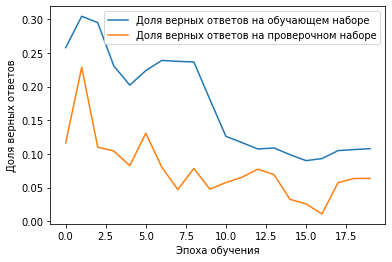

In [ ]:
#Создаём полносвязную сеть
model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(30, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.4))
model01.add(BatchNormalization())
#model01.add(Dense(len(trainText), activation='sigmoid'))
model01.add(Dense(len(trainText), activation='tanh'))

model01.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
history = model01.fit(xTrain01,
                      yTrain,
                      epochs=20,
                      batch_size=128,
                      validation_data=(xTest01, yTest))

plt.plot(history.history['acc'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Распознавание проверочной выборки


In [ ]:
def prepareTextForRecognition(testText, xLen, shift): #функция принимает последовательность индексов, размер окна, смещение окна
  testWordIndexes = tokenizer.texts_to_sequences([testText])
  print("Source text:",testText[:100])
  print("Indexes:",testWordIndexes[0][:10])
  print(len(testWordIndexes[0]))
  sample = getSetFromIndexes(testWordIndexes[0], xLen, shift)
  print("Number of text blocks of xLen:", len(sample))
  xTest = tokenizer.sequences_to_matrix(sample)

  return np.array(xTest)

In [ ]:
arr = np.array([[0.1, 0.3, 0.2, 0.6, 0.9],
                [0.7, 0.3, 0.2, 0.6, 0.5],
                [0.8, 0.3, 0.9, 0.6, 0.3]])
print(np.argmax(arr, axis=1))

srcTextBOW = prepareTextForRecognition(testText[3], xLen, step)
#Получаем результаты распознавания класса по блокам слов длины xLen
currPred = model01.predict(srcTextBOW)
print(currPred.shape)
print(currPred[:2])
#Определяем номер распознанного класса для каждого блока слов длины xLen
currOut = np.argmax(currPred, axis=1)

print(currOut)

[4 0 2]
Source text: ﻿Зачарованное паломничество    1  Гоблин со стропил следил за прячущимся монахом, который шпионил за
Indexes: [1537, 76, 3406, 22, 133, 22, 14059, 18330, 1, 977]
42715
Number of text blocks of xLen: 358
(358, 7)
[[1.6987324e-05 1.8984079e-05 6.2286854e-06 3.5908818e-04 2.3365021e-05
  2.4348497e-05 2.4139881e-06]
 [1.9401312e-05 2.1964312e-05 5.7220459e-06 3.5190582e-04 2.7537346e-05
  2.3245811e-05 2.3245811e-06]]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [ ]:
probability = [0]*nClasses

for i in range(len(testText)): #Проходим по всем классам
  probability[i] = np.count_nonzero(currOut == i)/len(currOut)

print(probability)

recognizedClass = np.argmax(probability)
print("Текст написан:", className[recognizedClass], "с вероятностью", probability[recognizedClass])

[0.0, 0.00558659217877095, 0.002793296089385475, 0.9860335195530726, 0.0, 0.00558659217877095, 0.0]
Текст написан: Саймак с вероятностью 0.9860335195530726


In [ ]:
###########################
# Представляем тестовую выборку в удобных для распознавания размерах
##########################
def createTestMultiClasses(wordIndexes, xLen, step): #функция принимает последовательность индексов, размер окна, шаг окна

  #Для каждого из 6 классов
  #Создаём тестовую выборку из индексов
  nClasses = len(wordIndexes) #задаем количество классов
  xTest6Classes01 = []                #здесь будет список из всех классов,каждый размером "кол-во окон в тексте * 20000(при maxWordsCount=20000)"
  xTest6Classes = []                 #здесь будет список массивов, каждый размером "кол-во окон в тексте * длину окна"(6 по 420*1000)
  for wI in wordIndexes:                       #для каждого тестового текста из последовательности индексов
    sample = (getSetFromIndexes(wI, xLen, step)) #тестовая выборка размером "кол-во окон*длину окна"(например 420*1000)
    xTest6Classes.append(np.array(sample))              #переводим в массив numpy и добавляем в список
    xTest6Classes01.append(tokenizer.sequences_to_matrix(sample)) #трансформируется в Bag of Words в виде "кол-во окон в тексте * 20000"
  xTest6Classes01 = np.array(xTest6Classes01)                     #и добавляется к нашему списку,

  return xTest6Classes01, xTest6Classes  #функция вернёт тестовые данные: TestBg 6 классов на n*20000 и xTestEm 6 по n*1000

###########################
# Расспознаём тестовую выборку и выводим результаты
##########################
def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()

  val = []
  pred = []

  totalSumRec = []

  #Проходим по всем классам
  for i in range(nClasses):
    #Получаем результаты распознавания класса по блокам слов длины xLen
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    #Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)

    #Считаем процент распознавания каждого класса за каждый
    #Получам матрицу 6 на 6
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))

    totalSumRec.append(sumRec[i])

    #Определяем, какой в класс в итоге за какой был распознан
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)

    #Выводим результаты распознавания по текущему классу
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " распознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)

  #Выводим вредний процент распознавания по всем классам вместе
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")

  print()

  return sumVal/sumCount

xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)

In [ ]:
#Проверяем точность нейронки обученной на bag of words
pred = recognizeMultiClass(model01, xTest6Classes01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  распознано  100 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  распознано  100 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  распознано  100 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  98 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  84 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  распознано  100 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!
Маринина  распознано  100 % сеть считает, что это  Маринина ,  распознано ВЕРНО!

Средний процент распознавания  95 %



#Embedding


**Embedding + Dense**

Train on 15779 samples, validate on 5674 samples
Epoch 1/30
15779/15779 [==============================] - 4s 231us/sample - loss: 0.9684 - acc: 0.7653 - val_loss: 2.1900 - val_acc: 0.3035
Epoch 2/30
15779/15779 [==============================] - 3s 201us/sample - loss: 0.3813 - acc: 0.9418 - val_loss: 2.4155 - val_acc: 0.3040
Epoch 3/30
15779/15779 [==============================] - 3s 200us/sample - loss: 0.1574 - acc: 0.9364 - val_loss: 2.4602 - val_acc: 0.3393
Epoch 4/30
15779/15779 [==============================] - 3s 200us/sample - loss: 0.1011 - acc: 0.9514 - val_loss: 2.1502 - val_acc: 0.3807
Epoch 5/30
15779/15779 [==============================] - 3s 200us/sample - loss: 0.0820 - acc: 0.9650 - val_loss: 1.6874 - val_acc: 0.4452
Epoch 6/30
15779/15779 [==============================] - 3s 200us/sample - loss: 0.0754 - acc: 0.9696 - val_loss: 1.3934 - val_acc: 0.5855
Epoch 7/30
15779/15779 [==============================] - 3s 201us/sample - loss: 0.0646 - acc: 0.9782 - val_lo

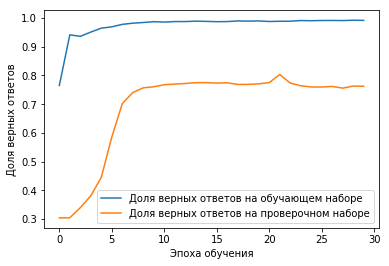

НЕЙРОНКА:  Embedding + Dense

О. Генри  распознано  22 % сеть считает, что это  Саймак ,  распознано НЕ ВЕРНО!
Стругацкие  распознано  33 % сеть считает, что это  Саймак ,  распознано НЕ ВЕРНО!
Булгаков  распознано  76 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  распознано  92 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  распознано  93 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  распознано  97 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  76 %



In [ ]:
#Создаём сеть с Embedding слоем
modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.2))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='sigmoid'))

modelE.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Обучаем сеть на xTrain
history = modelE.fit(xTrain,
                    yTrain,
                    epochs=30,
                    batch_size=200,
                    validation_data=(xTest, yTest))


plt.plot(history.history['acc'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Проверяем результаты работы Ebedding сети
xTest6Classes01, xTest6Classes = createTestMultiClasses(testWordIndexes, xLen, step)
pred = recognizeMultiClass(modelE, xTest6Classes, "Embedding + Dense")